In [38]:
import numpy as np
import matplotlib.pyplot as plt

from datasets import load_dataset

data = load_dataset("roszcz/maestro-v1-sustain")


Found cached dataset parquet (C:/Users/samue/.cache/huggingface/datasets/roszcz___parquet/roszcz--maestro-v1-sustain-5350ada51983a2ef/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


  0%|          | 0/3 [00:00<?, ?it/s]

In [39]:
records = data['train']['notes']
records_test = data['test']['notes']
records_valid = data['validation']['notes']


In [40]:
duration = []
start = []
for record in records:
    duration.extend(record['duration'])
    start.extend(record['start'])
for record in records_test:
    duration.extend(record['duration'])
    start.extend(record['start'])
for record in records_valid:
    duration.extend(record['duration'])
    start.extend(record['start'])

duration = np.array(duration)
start = np.array(start)

data length: 7040164
==========duration============start===
mean: 0.5103514354018718 457.401534944046
std: 0.8999690621324086 439.56806351877
max: 99.45833333333331 2624.5807291666665
min: 0.0010416666666515084 0.006510416666666666


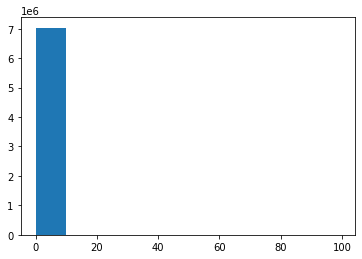

In [41]:
print("data length:" , len(duration))
print("==========duration============start===")
print("mean:" , np.mean(duration), np.mean(start))
print("std:" , np.std(duration), np.std(start))
print("max:" , np.max(duration), np.max(start))
print("min:" , np.min(duration), np.min(start))
plt.hist(duration, bins=10)
plt.show()

As the data is too skewed, normalizing it with min-max scalar would mean loosing a lot of space for useless information.

==========min_max_scaled============
mean: 0.005120889179671044
std: 0.009048799208696284
max: 1.0
min: 0.0


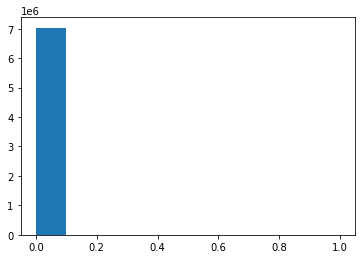

In [42]:
min_max_scaled = (duration - np.min(duration)) / (np.max(duration) - np.min(duration))
print("==========min_max_scaled============")
print("mean:" , np.mean(min_max_scaled))
print("std:" , np.std(min_max_scaled))
print("max:" , np.max(min_max_scaled))
print("min:" , np.min(min_max_scaled))
# Focus on duration since we are calculating dstart from start.
plt.hist(min_max_scaled, bins=10)
plt.show()

In [43]:

log_duration = np.log(1+duration)

==========log_scaled============
mean: 0.3381930889556512
std: 0.3345536351017544
max: 4.609743047833225
min: 0.001041124508395427


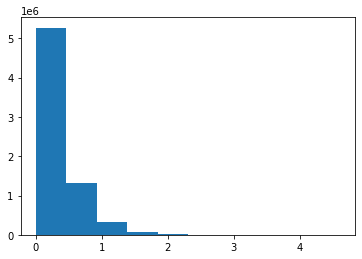

In [45]:
print("==========log_scaled============")
print("mean:" , np.mean(log_duration))
print("std:" , np.std(log_duration))
print("max:" , np.max(log_duration))
print("min:" , np.min(log_duration))

plt.hist(log_duration, bins=10)
plt.show()

Using log scaling, we reduced the skewness ~10 times, we can now apply min-max scalar to normalize the data further and fit into the [0, 1] range.

In [46]:
log_min_max_scaled = (log_duration - np.min(log_duration)) / (np.max(log_duration) - np.min(log_duration))

==========log_min_max_scaled============
mean: 0.07315551538295742
std: 0.07259172770722372
max: 1.0
min: 0.0


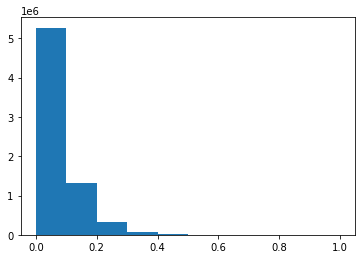

In [47]:
print("==========log_min_max_scaled============")
print("mean:" , np.mean(log_min_max_scaled))
print("std:" , np.std(log_min_max_scaled))
print("max:" , np.max(log_min_max_scaled))
print("min:" , np.min(log_min_max_scaled))
plt.hist(log_min_max_scaled, bins=10)
plt.show()

While the data is still skewed to the left, the range of values is now much higher inside the [0, 1] range.

Denormalizing is as simple as running below function on the data:

In [52]:
def denormalize(data, min, max):
    min_max = data * (max - min) + min
    # denormalize the log scaling
    return np.exp(min_max) - 1

In [50]:
denormalized = denormalize(log_min_max_scaled, np.min(log_duration), np.max(log_duration))

==========denormalized============
mean: 0.5103514354018718
std: 0.8999690621324086
max: 99.45833333333331
min: 0.0010416666666515084


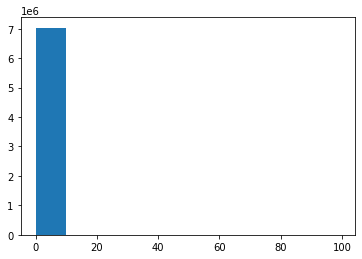

In [51]:
print("==========denormalized============")
print("mean:" , np.mean(denormalized))
print("std:" , np.std(denormalized))
print("max:" , np.max(denormalized))
print("min:" , np.min(denormalized))
plt.hist(denormalized, bins=10)
plt.show()